# Assignment 1
## Parth Lanukia

In [50]:
# First lets import data set and see what we have in it
import pandas as pd
df=pd.read_csv("C:\\Users\\frida\\Downloads\\Algerian_forest_fires_cleaned.csv")

In [51]:
print(df)

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI       Classes  Reg

In [52]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [53]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [54]:
df.shape

(243, 15)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


# Data Cleaning

In [56]:
df.isnull().sum() # To check hpw many nulls values we have in each column

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

Here we can see we have very clean data with zero missing values in it.

In [57]:
# Feature Engineering
selected_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']
X = df[selected_features]
y = df['FWI']

In [58]:
import pickle
# Encode target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Save the Label Encoder to a file for future use
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)

# EDA 

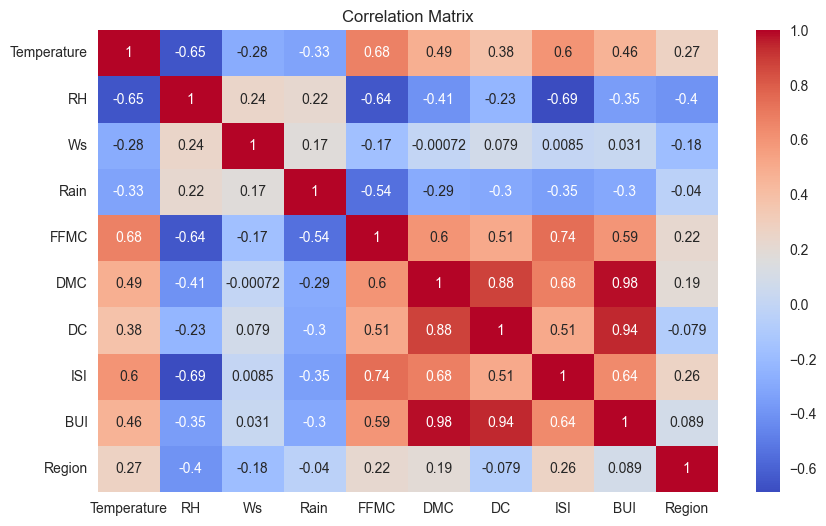

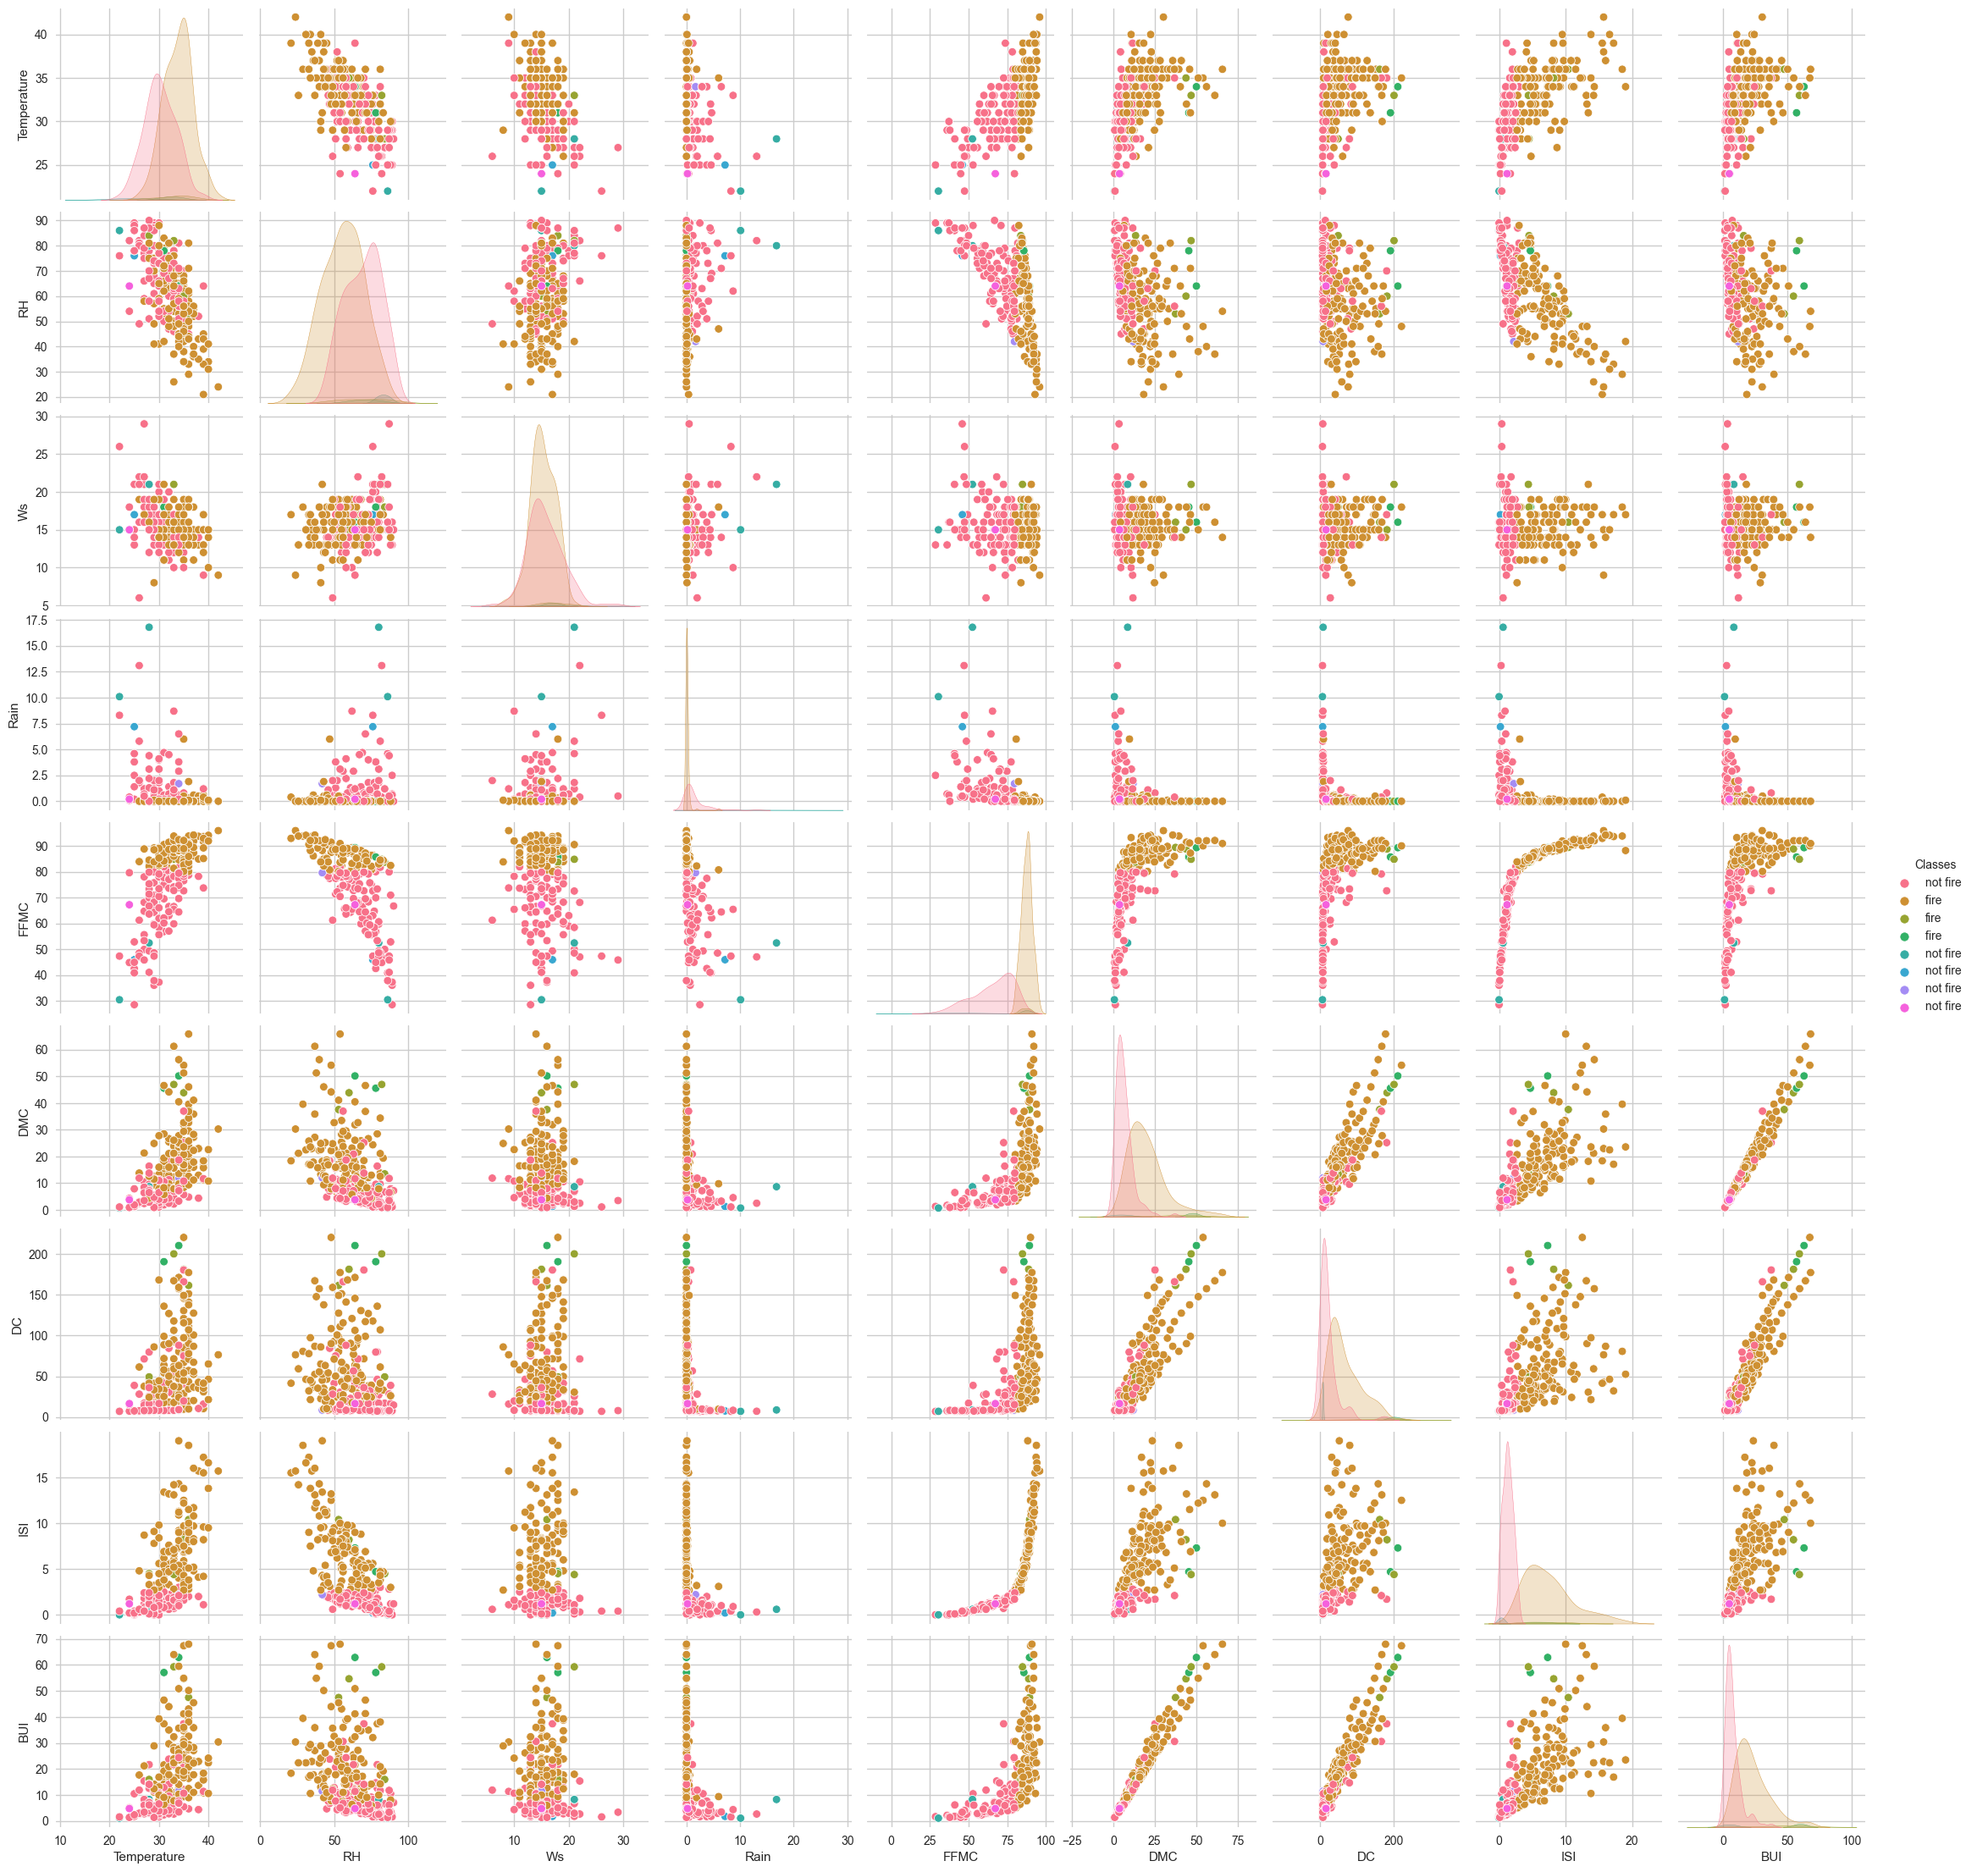

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization: Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[selected_features + ['Region']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for visualizing relationships
sns.pairplot(df[selected_features + ['Classes']], hue='Classes')
plt.show()


Observations

Positive Correlation:
Temperature has a strong positive correlation with FFMC (0.69) and ISI (0.62). FFMC, DMC, DC, ISI, BUI, and FWI are positively correlated with each other, with correlation coefficients ranging from 0.58 to 0.76.

Negative Correlation:
Temperature has a strong negative correlation with RH (-0.65). RH is negatively correlated with FFMC, DMC, DC, ISI, BUI, and FWI, with correlation coefficients ranging from -0.68 to -0.58. Rain is negatively correlated with FFMC, DMC, DC, ISI, BUI, and FWI, but the correlation is relatively weak (between -0.37 and -0.04).

Weak Correlation:
The correlation between Ws (wind speed) and other variables is weak, with coefficients ranging from -0.18 to 0.07. The correlation between the 'Region' variable and other variables is also weak, with coefficients ranging from -0.40 to 0.26.


In [60]:
df1 = df.drop(columns=['day','month','year'],axis=1)

In [61]:
df1['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [62]:
import numpy as np
## Encode categories in classes
df1['Classes']= np.where(df1['Classes'].str.contains("not fire"),0,1)


In [63]:
df1['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

For visulization we have encoded Classes cloumn into binary categories based on they contain string not fire.

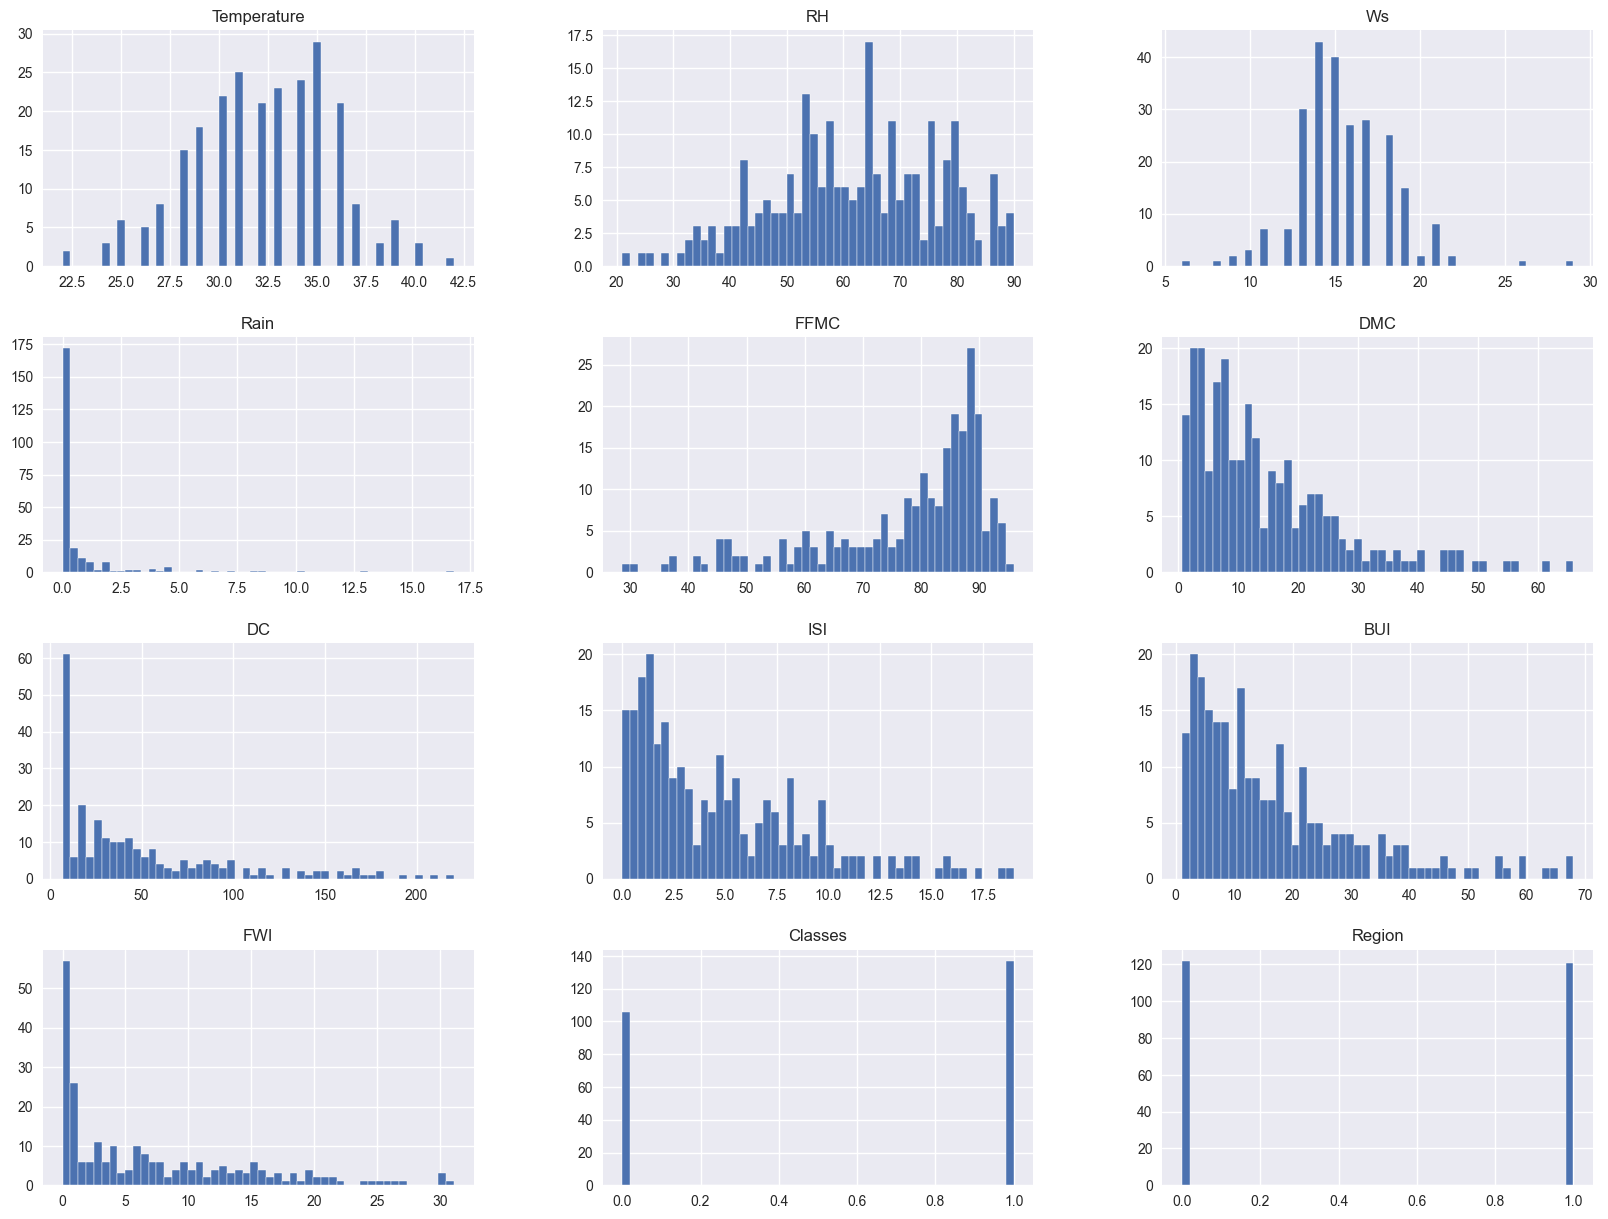

In [64]:
## Plot density plot for all features
plt.style.use('seaborn')
df1.hist(bins=50,figsize=(20,15))
plt.show()

In [65]:
# Percentage pie charts 
percentage = df1['Classes'].value_counts(normalize=True)*100
# here we are calculating the percentage distribution of the different categories in the 'Classes' column. 

Text(0.5, 1.0, 'Classes')

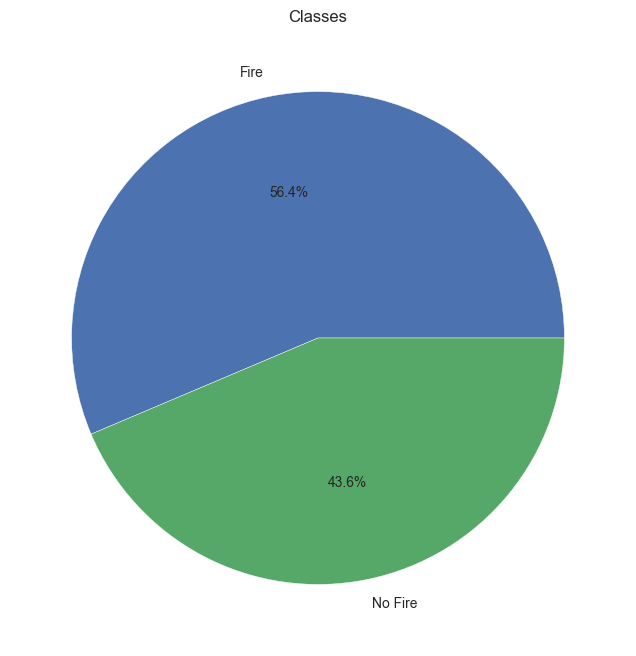

In [66]:
# plot pie charts 
class_lables = ["Fire","No Fire"]
plt.figure(figsize=(12,8))
plt.pie(percentage,labels=class_lables,autopct='%1.1f%%')
plt.title("Classes")

In [67]:
df1.corr()
# Here we are seeing correlation between independent variables.

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


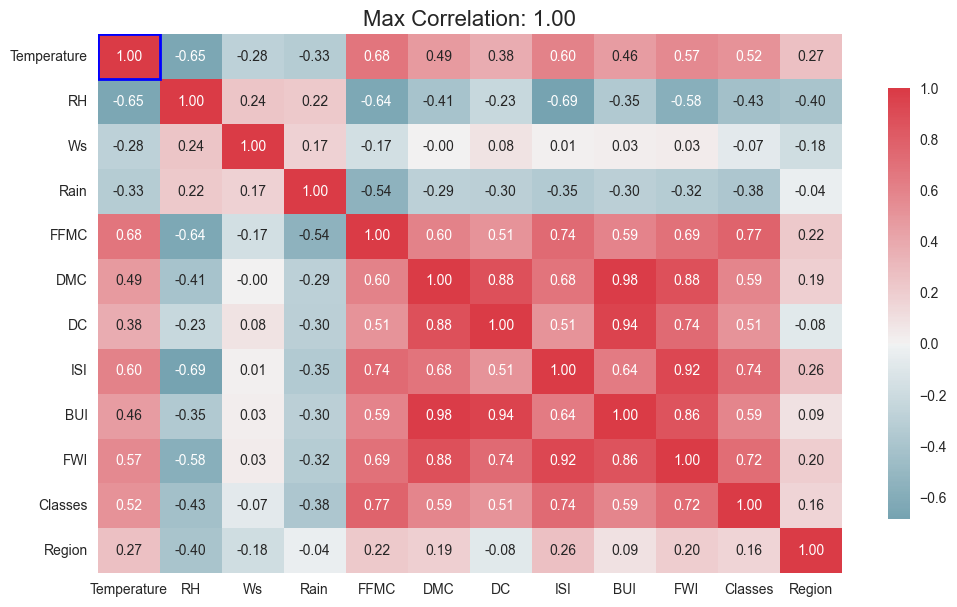

In [68]:
corr_matrix = df1.corr()

# Find the maximum correlation value and its indices
max_corr = corr_matrix.stack().max()
max_corr_indices = corr_matrix.stack().idxmax()

# Create a custom colormap for the heatmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Converting column names (strings) to numerical indices for the matplotlib coordinates
# Adjusting indices for matplotlib which uses zero-based indexing
# Converting column names to numerical indices
adjusted_indices = (corr_matrix.columns.get_loc(max_corr_indices[1]), corr_matrix.index.get_loc(max_corr_indices[0]))
plt.figure(figsize=(12, 7))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, center=0, cbar_kws={"shrink": 0.8})
plt.title(f'Max Correlation: {max_corr:.2f}', fontsize=16)

# Highlight the cell with the highest correlation value
highlighted_cell = plt.Rectangle(adjusted_indices, 1, 1, fill=False, edgecolor='blue', lw=2)
ax.add_patch(highlighted_cell)

plt.show()

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

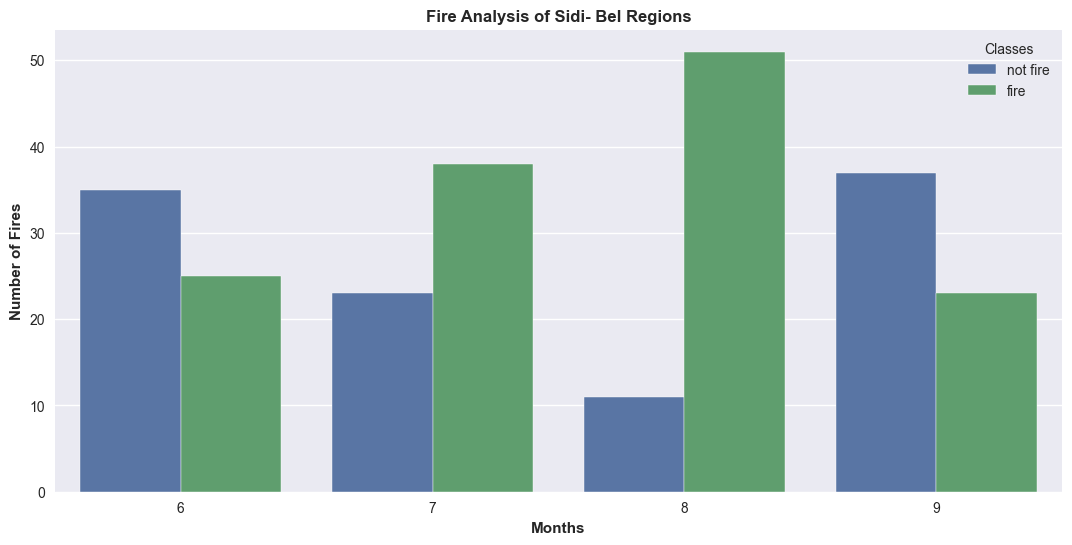

In [69]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Its observed that August and July had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was in September

# Model Training

In [70]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


## Linear Regression

In [71]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

# Save the linear regression model to a file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lr, file)


In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate testing metrics
mael1 = mean_absolute_error(y_test, lr_predictions)
mse = mean_squared_error(y_test, lr_predictions)
rmse = np.sqrt(mse)
r2l1 = r2_score(y_test, lr_predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 5.0669265139639705
Mean Squared Error (MSE): 67.00145849590753
Root Mean Squared Error (RMSE): 8.185441863204913
R-squared (R²): -322.21265388043554


We have a very low MAE here.

# Poly regression

In [106]:
# Polynomial Regression 
poly = PolynomialFeatures(degree=1)
X_poly_train = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
poly_predictions = poly_model.predict(poly.transform(X_test))

# Save the polynomial regression model and transformer to files
with open('poly_regression_model.pkl', 'wb') as file:
    pickle.dump(poly_model, file)
with open('poly_transform.pkl', 'wb') as file:
    pickle.dump(poly, file)

In [107]:
# Compute evaluation metrics
mse = mean_squared_error(y_test, poly_predictions)
rmse = np.sqrt(mse)
maep1 = mean_absolute_error(y_test, poly_predictions)
r2p1 = r2_score(y_test, poly_predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", maep1)
print("R-squared (R2) Score:", r2p1)

Mean Squared Error (MSE): 40.72322469880232
Root Mean Squared Error (RMSE): 6.381475119343671
Mean Absolute Error (MAE): 5.066926513963964
R-squared (R2) Score: 0.9592634735782845


# Linear regression Model 2

Now we gonna do some feature scaling using standard scaler and again make a linear regression model. And see what results we get.

In [75]:
# This function helps in identifying and potentially removing features that are highly correlated, 
# thereby reducing multicollinearity, which can affect the performance of certain types of models.
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [76]:
## threshold--Domain expertise
corr_features=correlation(X_train, 0.85)

We have set the threshold to 0.85, we are looking for features that have a very strong correlation with each other. These highly correlated features can potentially redundant in our model, and removing one of them can help improve the our model's accuracy and make it easier to interpret the relationships between features and the target variable.



In [77]:
corr_features

{'BUI', 'DC'}

'bui', 'dc'  are highly correlated, they might be redundant in our regression model. To avoid multicollinearity issues and improve the model's performance, we decide to remove "dc" from one of these features.

In [78]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((194, 7), (49, 7))

In [79]:
# import and use StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [80]:
X_train_scaled


array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.69568332,
        -0.74341993, -0.79648833],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.00119988,
         3.53088931,  1.88757476],
       [ 1.5942444 , -1.25454906, -0.99568804, ...,  0.49000494,
        -0.168916  , -0.19488798],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -2.27896765,
        -1.06514213, -1.0972885 ],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.71010277,
         0.32898741,  0.56868169],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -1.39147643,
        -1.01918182, -0.88904223]])

The effect of standard scaler.

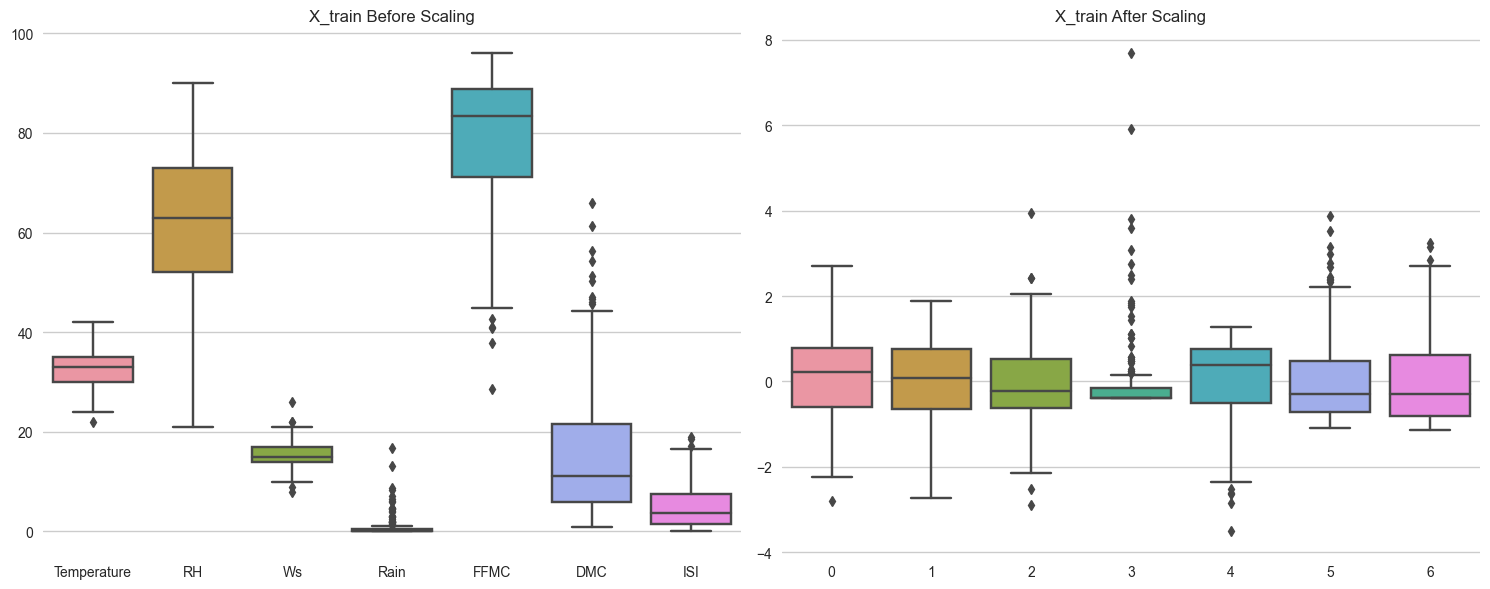

In [81]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title("X_train Before Scaling")

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")

plt.tight_layout()
plt.show()

These visualizations underscore the transformative impact of feature scaling on data prepared for machine learning, helping to clarify the role of scaling in the modeling pipeline.

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
linreg_mae=mean_absolute_error(y_test,y_pred)
linreg_score=r2_score(y_test,y_pred)
print("Mean absolute error: ", linreg_mae)
print("R2 Score: ", linreg_score)

Mean absolute error:  5.0669265139639705
R2 Score:  0.9592634735782843


Here I cannot see much diiference between the evalaution metric scores of bpth linear regression models. 

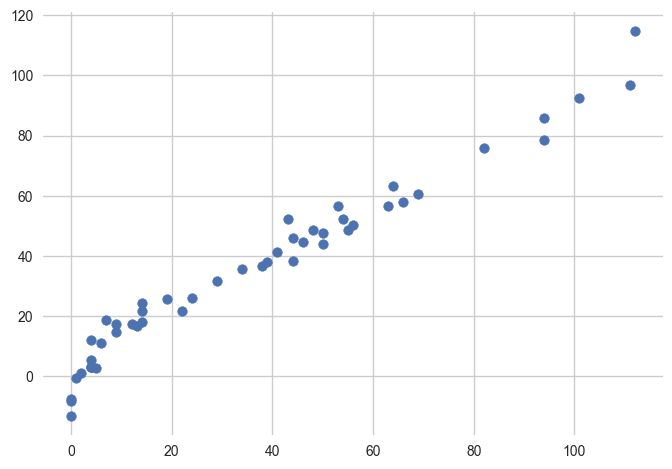

In [83]:
plt.scatter(y_test,y_pred)

# Laaso Regression 

Lasso with Scaled data.

In [93]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred1=lasso.predict(X_test_scaled)
maela1=mean_absolute_error(y_test,y_pred1)
r2la1=r2_score(y_test,y_pred1)
print("Mean absolute error: ", maela1)
print("R2 Score: ", r2la1)

Mean absolute error:  5.919188219650123
R2 Score:  0.9488838499138755


Laaso without scaled data.

In [94]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred2=lasso.predict(X_test)
maela2=mean_absolute_error(y_test,y_pred)
r2la2=r2_score(y_test,y_pred2)
print("Mean absolute error: ", maela2)
print("R2 Score: ", r2la2)

Mean absolute error:  5.0669265139639705
R2 Score:  0.9572578395249298


# Grid Search

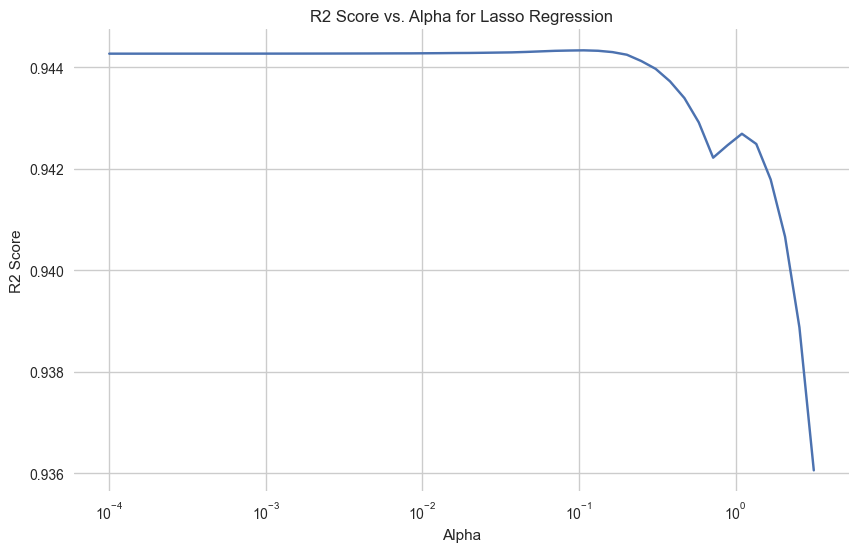

Best alpha:  {'alpha': 0.10730309405261565}
Mean absolute error:  5.0669265139639705
R2 Score:  0.9588573275572327


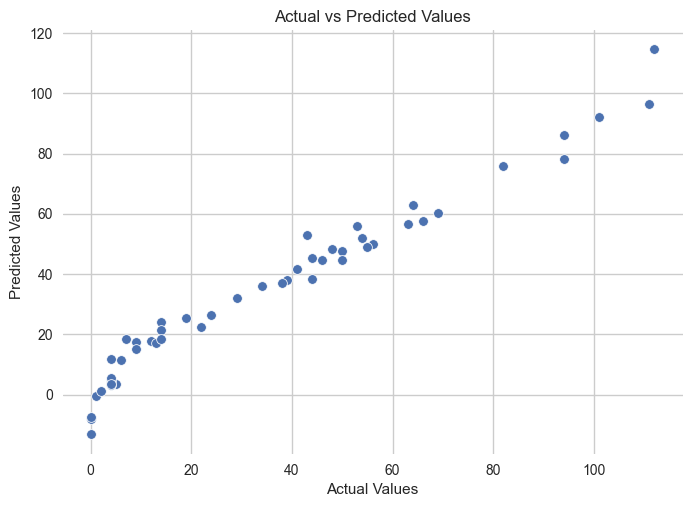

In [114]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Set up Grid Search with Cross-Validation
alpha_range = np.logspace(-4, 0.5, 50)
param_grid = {"alpha": alpha_range}
grid = GridSearchCV(Lasso(), param_grid, cv=5, scoring="r2")

# Fit the Grid Search model
grid.fit(X_train_scaled, y_train)

# Extract the scores and plot them
mean_scores = grid.cv_results_["mean_test_score"]
# Plotting R2 Score against different hyperparameters
plt.figure(figsize=(10, 6))
sns.lineplot(x=alpha_range, y=mean_scores)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R2 Score")
plt.title("R2 Score vs. Alpha for Lasso Regression")
plt.show()

# Find the best parameters
print("Best alpha: ", grid.best_params_)

# Re-fit the Lasso model with the best parameters
best_lasso = Lasso(alpha=grid.best_params_["alpha"])
best_lasso.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred3 = best_lasso.predict(X_test_scaled)
lasso_maes = mean_absolute_error(y_test, y_pred)
lasso_scores = r2_score(y_test, y_pred3)
print("Mean absolute error: ", lasso_maes)
print("R2 Score: ", lasso_scores)

# Plot the results
sns.scatterplot(x=y_test, y=y_pred3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


# Without scaled data.Grid Search

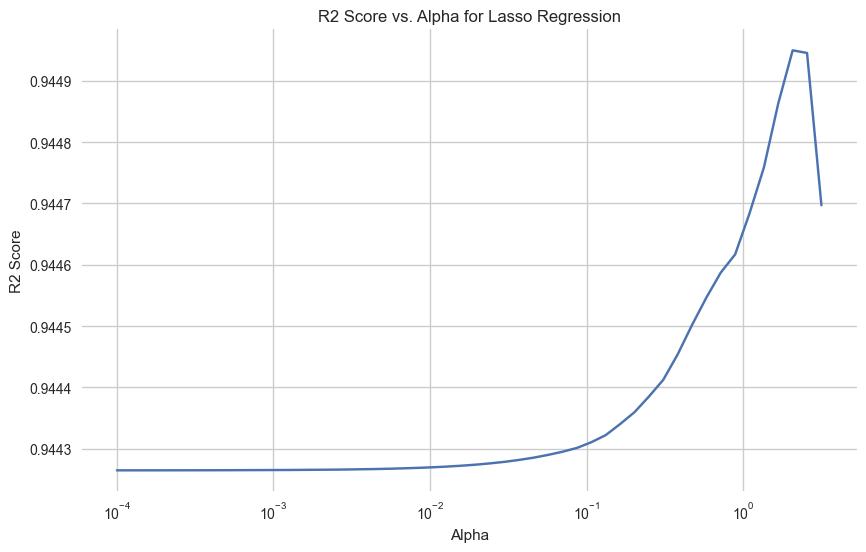

Best alpha:  {'alpha': 2.0716983998953076}
Mean absolute error:  5.0669265139639705
R2 Score:  0.9542702640509246


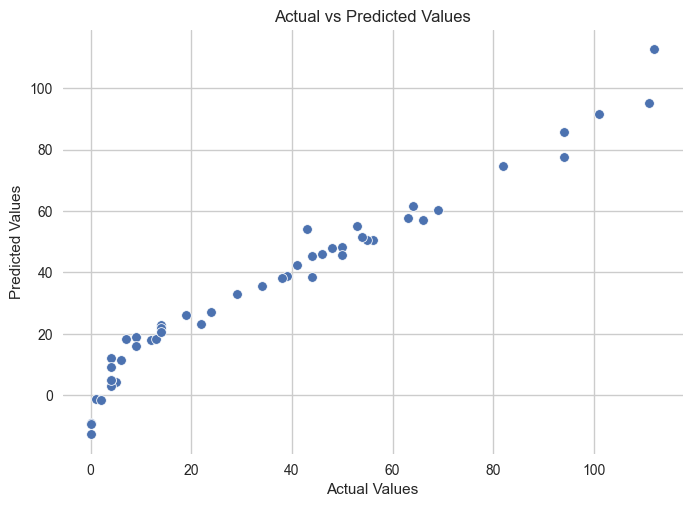

In [113]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Set up Grid Search with Cross-Validation
alpha_range = np.logspace(-4, 0.5, 50)
param_grid = {"alpha": alpha_range}
grid = GridSearchCV(Lasso(), param_grid, cv=5, scoring="r2")

# Fit the Grid Search model
grid.fit(X_train, y_train)

# Extract the scores and plot them
mean_scores = grid.cv_results_["mean_test_score"]
# Plotting R2 Score against different hyperparameters
plt.figure(figsize=(10, 6))
sns.lineplot(x=alpha_range, y=mean_scores)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R2 Score")
plt.title("R2 Score vs. Alpha for Lasso Regression")
plt.show()

# Find the best parameters
print("Best alpha: ", grid.best_params_)

# Re-fit the Lasso model with the best parameters
best_lasso = Lasso(alpha=grid.best_params_["alpha"])
best_lasso.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred4 = best_lasso.predict(X_test)
lasso_maep = mean_absolute_error(y_test, y_pred)
lasso_scorep = r2_score(y_test, y_pred4)
print("Mean absolute error: ", lasso_maep)
print("R2 Score: ", lasso_scorep)

# Plot the results
sns.scatterplot(x=y_test, y=y_pred4)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


# Ridge Regression

In [88]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred5=ridge.predict(X_test_scaled)
ridge_mae_plain=mean_absolute_error(y_test,y_pred5)
ridge_score_plain=r2_score(y_test,y_pred5)
print("Mean absolute error: ", ridge_mae_plain)
print("R2 Score: ", ridge_score_plain)

Mean absolute error:  5.110847219169085
R2 Score:  0.9582204119667391


In [95]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred6=ridge.predict(X_test)
ridge_mae_scaled=mean_absolute_error(y_test,y_pred6)
ridge_score_scaled=r2_score(y_test,y_pred6)
print("Mean absolute error: ", ridge_mae_scaled)
print("R2 Score: ", ridge_score_scaled)

Mean absolute error:  5.068688321974553
R2 Score:  0.9592084358712213


Here we can see that there is no much difference between evaluation matric data of Ridge regression model. First model is trained with scaled data using Standard Scaling method and second model was trained using normal data. 

# Grid Search use

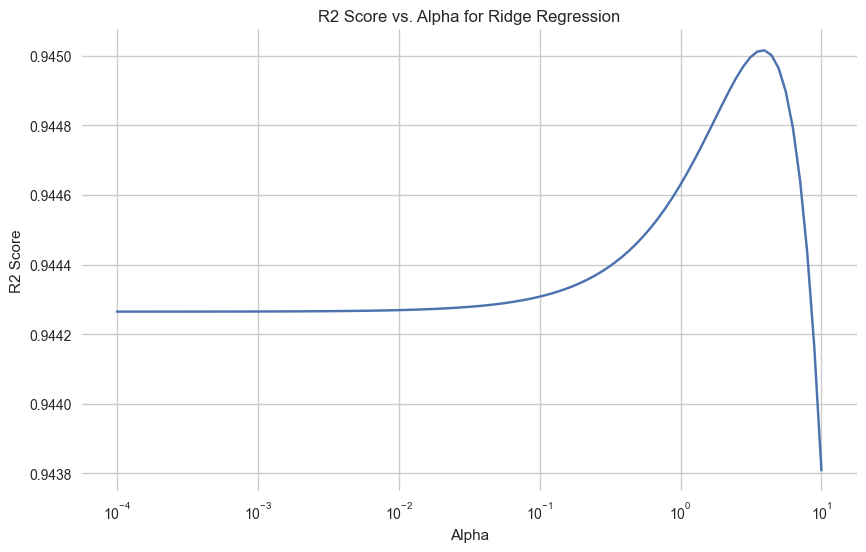

Best alpha:  {'alpha': 3.944206059437656}
Mean absolute error:  5.243387090553187
R2 Score:  0.9548861358930425


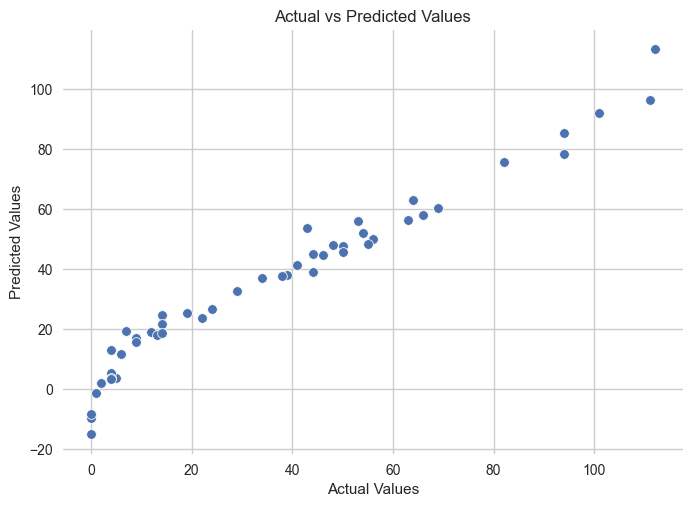

In [90]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# Set up Grid Search with Cross-Validation
alpha_range = np.logspace(-4, 1, 100)  # Range for alpha
param_grid = {"alpha": alpha_range}
grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring="r2")

# Fit the Grid Search model
grid.fit(X_train_scaled, y_train)

# Extract the scores and plot them
mean_scores = grid.cv_results_["mean_test_score"]
# Plotting R2 Score against different hyperparameters
plt.figure(figsize=(10, 6))
sns.lineplot(x=alpha_range, y=mean_scores)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R2 Score")
plt.title("R2 Score vs. Alpha for Ridge Regression")
plt.show()

# Find the best parameters
print("Best alpha: ", grid.best_params_)
# Re-fit the Ridge model with the best parameters
best_ridge = Ridge(alpha=grid.best_params_["alpha"])
best_ridge.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred7 = best_ridge.predict(X_test_scaled)
ridge_mae = mean_absolute_error(y_test, y_pred7)
ridge_score = r2_score(y_test, y_pred7)
print("Mean absolute error: ", ridge_mae)
print("R2 Score: ", ridge_score)

# Plot the results
sns.scatterplot(x=y_test, y=y_pred7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


# Comparing all models

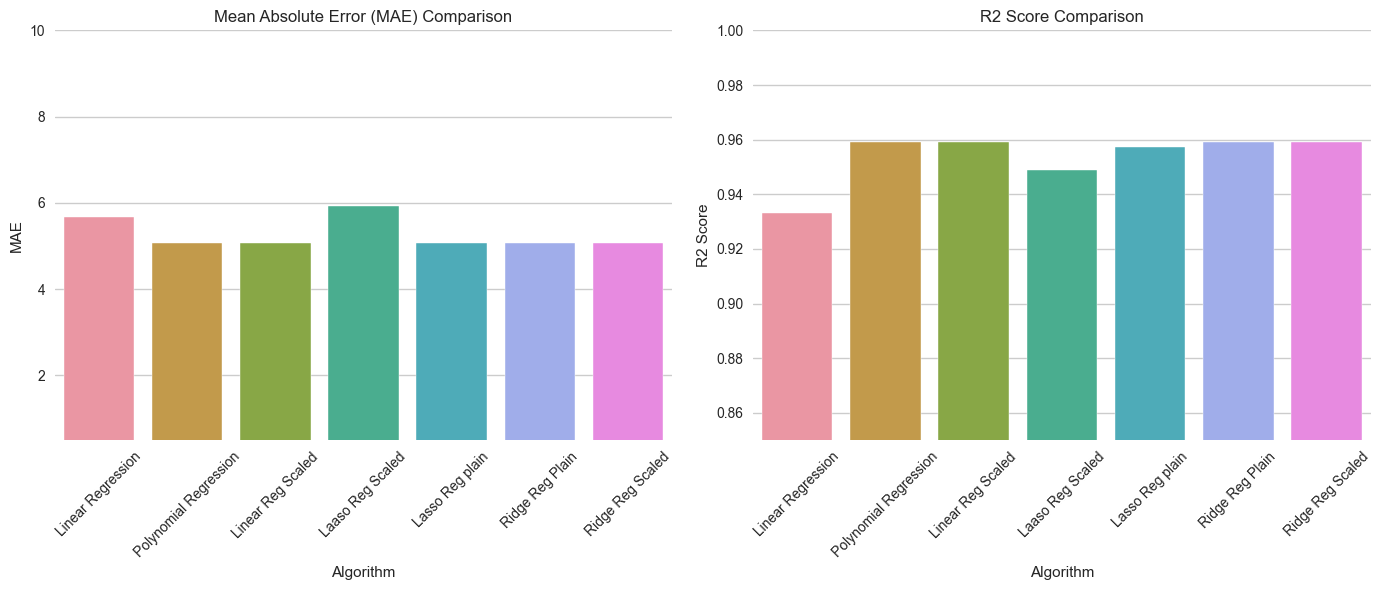

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

metrics = {
    "Algorithm": [
        "Linear Regression",
        "Polynomial Regression",
        "Linear Reg Scaled",
        "Laaso Reg Scaled",
        "Lasso Reg plain",
        "Ridge Reg Plain",
        "Ridge Reg Scaled",
    ],
    "MAE": [
        mael1,
        maep1,
        linreg_mae,
        maela1,
        maela2,
        ridge_mae_plain,
        ridge_mae_scaled,
    ],
    "R2 Score": [
        r2l1,
        r2p1,
        linreg_score,
        r2la1,
        r2la2,
        ridge_score_plain,
        ridge_score_scaled,
    ],
}

# Converting to DataFrame for easier plotting
df_metrics = pd.DataFrame(metrics)

# Plotting
plt.figure(figsize=(14, 6))

# MAE Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x="Algorithm", y="MAE", data=df_metrics)
plt.title("Mean Absolute Error (MAE) Comparison")
plt.xticks(rotation=45)
plt.ylim([0.5, 10])
plt.ylabel("MAE")

# R2 Score Bar Plot
plt.subplot(1, 2, 2)
sns.barplot(x="Algorithm", y="R2 Score", data=df_metrics)
plt.title("R2 Score Comparison")
plt.xticks(rotation=45)
plt.ylim([0.85, 1])
plt.ylabel("R2 Score")

plt.tight_layout()
plt.show()

Now we will see comparison between Laaso and Ridge model but using Grid Search.

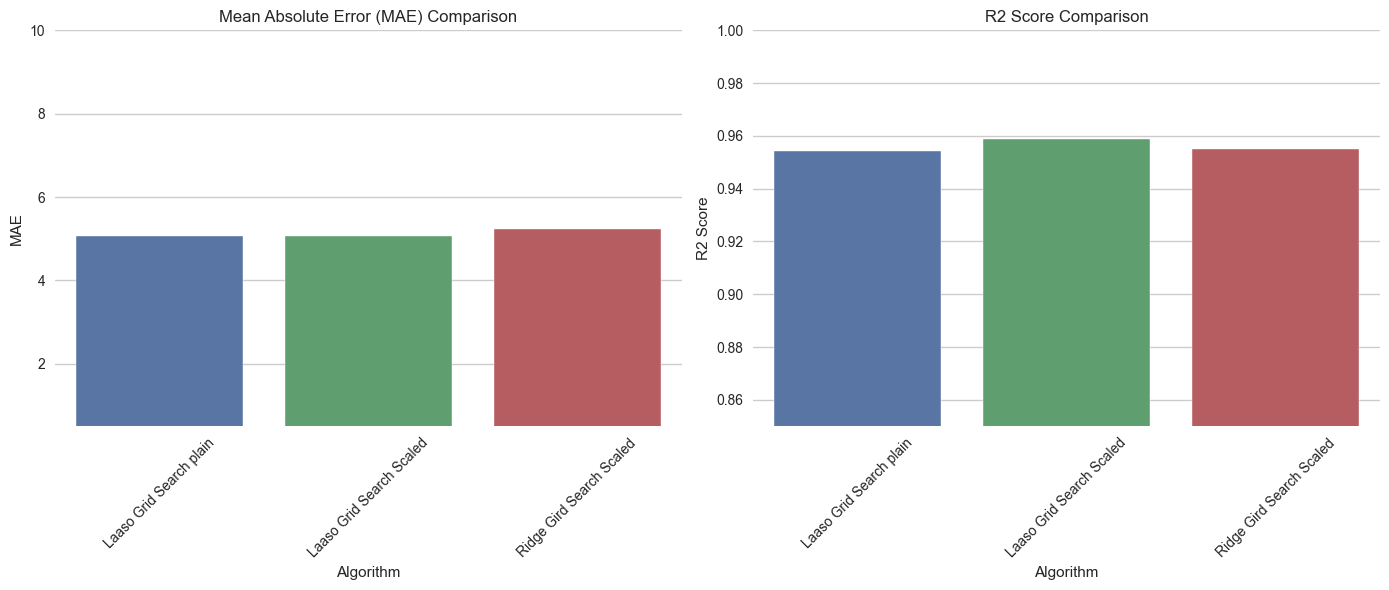

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

metrics1 = {
    "Algorithm": [
        "Laaso Grid Search plain",
        "Laaso Grid Search Scaled",
        "Ridge Gird Search Scaled"
    ],
    "MAE": [
        lasso_maep,
        lasso_maes,
        ridge_mae,
        
    ],
    "R2 Score": [
        lasso_scorep,
        lasso_scores,
        ridge_score,
       
    ],
}

# Converting to DataFrame for easier plotting
df_metrics1 = pd.DataFrame(metrics1)

# Plotting
plt.figure(figsize=(14, 6))

# MAE Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x="Algorithm", y="MAE", data=df_metrics1)
plt.title("Mean Absolute Error (MAE) Comparison")
plt.xticks(rotation=45)
plt.ylim([0.5, 10])
plt.ylabel("MAE")

# R2 Score Bar Plot
plt.subplot(1, 2, 2)
sns.barplot(x="Algorithm", y="R2 Score", data=df_metrics1)
plt.title("R2 Score Comparison")
plt.xticks(rotation=45)
plt.ylim([0.85, 1])
plt.ylabel("R2 Score")

plt.tight_layout()
plt.show()

# Pickle File

Some models we have saved during execution above and rest all we are gonna save now.

In [117]:
# Save the linear regression 2 model to a file
with open('linear_regression_scaled_model.pkl', 'wb') as file: # Scaled data trained model
    pickle.dump(linreg, file)



In [118]:
# Save the polyomial regression  model to a file
with open('poly_regression_model.pkl', 'wb') as file:
    pickle.dump(poly_model, file)

In [119]:
# Save the Lasso regression with scaled data  model to a file
with open('lasso_scaled.pkl', 'wb') as file:
    pickle.dump(lasso, file)

In [120]:
# Save the Ridge Scaled Rgression  model to a file
with open('ridge_scaled_model.pkl', 'wb') as file:
    pickle.dump(ridge, file)

# Testing on New data

Here I am doing testing only using Linear Regression model we made using scaled data.

In [122]:
# load new data
newdata=pd.read_csv("C:\\Users\\frida\\Downloads\\archive\\Algerian_forest_fires_cleaned_dataset.csv")

In [123]:
import pickle

# Load the trained model from the pickle file
with open('linear_regression_scaled_model.pkl', 'rb') as file:
    model1 = pickle.load(file)


In [126]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [134]:
newdata1 = newdata.drop(columns=['day','month','year','Classes','FWI','Region','DC','BUI'],axis=1)

In [140]:
# Example preprocessing (customize based on your actual preprocessing steps)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(newdata1)


In [136]:
# Make predictions
predictions = model1.predict(new_data_scaled)

In [138]:
print(predictions)

[ 4.43520354e+00  3.26634264e+00 -1.59896723e+00 -1.22483345e+01
  6.89431344e+00  2.59469926e+01  4.95568731e+01  5.08943901e+01
  5.56780028e+00  1.81523113e+01  3.94307393e+01  4.86273805e+01
  5.04496006e+00  7.78771038e+00 -1.34431131e+00 -8.07252308e+00
 -7.50785308e+00  1.32328957e+00  1.73909734e+01  5.77309086e+00
  2.54014088e+01  2.26469036e+01  2.94744530e+01  4.89384224e+01
  5.21826915e+01  6.29872208e+01  8.14068846e+01  7.57093357e+01
  3.01304779e+01  6.92255384e+01  3.23256076e+00  9.84416102e-01
  8.75043782e+00  2.52570791e+01  3.96996078e+01  4.76614156e+01
  2.94017401e+01  5.39654806e+01  1.18497696e+01  1.01565609e+01
  2.81513232e+01  1.83100962e+01  3.44190630e+01  1.48790293e+01
  9.95549529e+00  1.23198247e+01  3.09492578e+01  4.35302397e+01
  6.23782726e+01  3.19649909e+01  5.64792688e+01  3.05424848e+01
  1.89900099e+01  1.83020369e+01  4.48245414e+01  8.16965450e+01
  7.81636168e+01  6.73762421e+01  6.90799726e+01  6.66352580e+01
  8.18151706e+01  1.33609